In [ ]:
!pip install --quiet defsent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00


In [ ]:
!pip install --quiet datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.8 MB/s eta 0:00:00


In [ ]:
from defsent import DefSent
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
!nvidia-smi

Wed Jun 21 15:10:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [ ]:
def cos_sim(a,b):
    return np.dot(a, b)/(norm(a)*norm(b))
def cos_sims(a,b):
    results = []
    for i in range(len(a)):
        results.append(cos_sim(a[i],b[i]))
    return np.array(results)
def get_name(name):
  return f'{name=}'.split('=')[0]

In [ ]:
from datasets import load_dataset
sts12 = load_dataset('mteb/sts12-sts', split='test')
sts13 = load_dataset('mteb/sts13-sts', split='test')
sts14 = load_dataset('mteb/sts14-sts', split='test')
sts15 = load_dataset('mteb/sts15-sts', split='test')
sts16 = load_dataset('mteb/sts16-sts', split='test')
stsB = load_dataset('mteb/stsbenchmark-sts', split='test')
sickR = load_dataset('mteb/sickr-sts', split='test')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/mteb___json/mteb--sts12-sts-444437a5fe146502/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/mteb___json/mteb--sts13-sts-0df24c93e6f8acc5/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/mteb___json/mteb--sts14-sts-fd69e41418b13f15/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/mteb___json/mteb--sts15-sts-6ed661b5b5d73112/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/mteb___json/mteb--sts16-sts-d36c6c2e716b3a02/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/mteb___json/mteb--stsbenchmark-sts-b78a0ad89d46b37e/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/mteb___json/mteb--sickr-sts-b678d66a1f60f6a6/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


In [ ]:
n_samples = 1000
list_data = [sts12, sts13, sts14, sts15, sts16, stsB, sickR]
list_data = [pd.DataFrame(data).sample(frac=1).iloc[0:n_samples] for data in list_data]
list_data_name = ['sts12', 'sts13', 'sts14', 'sts15', 'sts16', 'stsB', 'sickR']

In [ ]:
list_model = ['defsent-bert-base-uncased-cls',
              'defsent-bert-base-uncased-mean',
              'defsent-bert-base-uncased-max',
              'defsent-bert-large-uncased-cls',
              'defsent-bert-large-uncased-mean',
              'defsent-bert-large-uncased-max',
              'defsent-roberta-base-cls',
              'defsent-roberta-base-mean',
              'defsent-roberta-base-max',
              'defsent-roberta-large-cls',
              'defsent-roberta-large-mean',
              'defsent-roberta-large-max']

In [ ]:
from scipy import stats
def evaluate(datas, model_name):
  name = f'cl-nagoya/{model_name}'
  model = DefSent(name, device=torch.device('cuda'))
  list_res = []
  for data in datas:
    sentences1 = [da for da in data['sentence1']]
    sentences2 = [da for da in data['sentence2']]
    embeddings1 = model.encode(sentences1)
    embeddings2 = model.encode(sentences2)
    score_true = data['score']
    score_predict = cos_sims(embeddings1, embeddings2)
    results = stats.spearmanr(score_true, score_predict)
    list_res.append(results.statistic)
  return list_res

In [ ]:
def eval_multi_model(datas, model_names):
  list_res = []
  for i, name in enumerate(model_names):
    res = evaluate(datas, name)
    list_res.append(res)
    print(f'model number {i}, id: {name}. Done!')
  return list_res;


In [ ]:
res_df = eval_multi_model(list_data, list_model)

model number 0, id: defsent-bert-base-uncased-cls. Done!
model number 1, id: defsent-bert-base-uncased-mean. Done!
model number 2, id: defsent-bert-base-uncased-max. Done!
model number 3, id: defsent-bert-large-uncased-cls. Done!
model number 4, id: defsent-bert-large-uncased-mean. Done!
model number 5, id: defsent-bert-large-uncased-max. Done!
model number 6, id: defsent-roberta-base-cls. Done!
model number 7, id: defsent-roberta-base-mean. Done!
model number 8, id: defsent-roberta-base-max. Done!
model number 9, id: defsent-roberta-large-cls. Done!
model number 10, id: defsent-roberta-large-mean. Done!
model number 11, id: defsent-roberta-large-max. Done!


In [ ]:
res_df = pd.DataFrame(res_df, columns=list_data_name, index=list_model)
res_df = res_df*100
res_df['avg'] = res_df.mean(axis=1)
res_df['mode'] = 'my-result'

In [ ]:
res_df.head(12)

,sts12,sts13,sts14,sts15,sts16,stsB,sickR,avg,mode
defsent-bert-base-uncased-cls,66.447543,79.946179,68.042383,76.941491,75.009456,76.743362,71.589085,73.531357,my-result
defsent-bert-base-uncased-mean,65.995992,82.345969,72.273877,78.666483,75.314724,78.880723,70.790893,74.895523,my-result
defsent-bert-base-uncased-max,63.518719,81.728070,71.966300,78.215949,74.727393,77.722339,70.644248,74.074717,my-result
defsent-bert-large-uncased-cls,64.445972,82.001219,69.374782,80.390222,74.264642,75.213907,72.742954,74.061957,my-result
defsent-bert-large-uncased-mean,60.848518,82.075844,73.008723,80.055387,76.624515,79.513765,73.213213,75.048566,my-result
defsent-bert-large-uncased-max,57.378722,80.675111,72.122269,77.572195,74.721930,77.552050,71.988775,73.144436,my-result
defsent-roberta-base-cls,66.430906,80.958343,71.949845,80.119705,78.597771,80.347684,74.349334,76.107655,my-result
defsent-roberta-base-mean,59.967669,77.365887,68.844072,76.478051,76.814582,78.991521,72.453146,72.987847,my-result
defsent-roberta-base-max,63.560158,77.625970,68.011714,77.533919,78.221980,80.355568,73.770158,74.154210,my-result
defsent-roberta-large-cls,64.412949,79.297700,72.892863,75.869910,76.984467,80.203748,74.776125,74.919680,my-result


In [ ]:
paper_df = pd.read_csv('/content/papersts-res.csv')
paper_df.index = list_model
paper_df.head(12)

,sts12,sts13,sts14,sts15,sts16,stsB,sickR,avg,mode
defsent-bert-base-uncased-cls,67.61,80.44,70.12,77.50,76.34,75.25,71.71,74.14,paper_result
defsent-bert-base-uncased-mean,68.24,82.62,72.80,78.44,76.79,77.50,71.69,75.44,paper_result
defsent-bert-base-uncased-max,65.32,82.00,73.00,77.38,75.84,76.74,71.67,74.57,paper_result
defsent-bert-large-uncased-cls,67.03,82.41,71.25,80.33,75.43,73.83,73.34,74.80,paper_result
defsent-bert-large-uncased-mean,63.93,82.43,73.29,80.52,77.84,78.41,73.39,75.69,paper_result
defsent-bert-large-uncased-max,60.15,80.70,71.67,77.19,75.71,76.90,72.57,73.55,paper_result
defsent-roberta-base-cls,66.13,80.96,72.59,78.33,78.85,78.51,74.44,75.69,paper_result
defsent-roberta-base-mean,62.38,78.42,70.79,74.60,77.32,77.38,73.07,73.42,paper_result
defsent-roberta-base-max,64.61,78.76,70.24,76.07,79.02,78.34,74.54,74.51,paper_result
defsent-roberta-large-cls,62.47,79.07,69.87,72.62,77.87,79.11,73.95,73.56,paper_result


In [ ]:
combine_df = pd.concat([res_df, paper_df])
combine_df['model'] = combine_df.index.map(lambda x: x[8:])
combine_df.head(24)

,sts12,sts13,sts14,sts15,sts16,stsB,sickR,avg,mode,model
defsent-bert-base-uncased-cls,66.447543,79.946179,68.042383,76.941491,75.009456,76.743362,71.589085,73.531357,my-result,bert-base-uncased-cls
defsent-bert-base-uncased-mean,65.995992,82.345969,72.273877,78.666483,75.314724,78.880723,70.790893,74.895523,my-result,bert-base-uncased-mean
defsent-bert-base-uncased-max,63.518719,81.728070,71.966300,78.215949,74.727393,77.722339,70.644248,74.074717,my-result,bert-base-uncased-max
defsent-bert-large-uncased-cls,64.445972,82.001219,69.374782,80.390222,74.264642,75.213907,72.742954,74.061957,my-result,bert-large-uncased-cls
defsent-bert-large-uncased-mean,60.848518,82.075844,73.008723,80.055387,76.624515,79.513765,73.213213,75.048566,my-result,bert-large-uncased-mean
defsent-bert-large-uncased-max,57.378722,80.675111,72.122269,77.572195,74.721930,77.552050,71.988775,73.144436,my-result,bert-large-uncased-max
defsent-roberta-base-cls,66.430906,80.958343,71.949845,80.119705,78.597771,80.347684,74.349334,76.107655,my-result,roberta-base-cls
defsent-roberta-base-mean,59.967669,77.365887,68.844072,76.478051,76.814582,78.991521,72.453146,72.987847,my-result,roberta-base-mean
defsent-roberta-base-max,63.560158,77.625970,68.011714,77.533919,78.221980,80.355568,73.770158,74.154210,my-result,roberta-base-max
defsent-roberta-large-cls,64.412949,79.297700,72.892863,75.869910,76.984467,80.203748,74.776125,74.919680,my-result,roberta-large-cls


## STS12, STS13, STS14, STS15, STS16, STS benchmark, sickR, AVERAGE

In [ ]:
def plot_compare(df, name_data, hue=None):
  plt.figure(figsize=(25,10))
  sns.barplot(df, x='model', y=name_data, hue=hue)
  plt.title(f"Comparision between my exprimental and paper's exprimental on {name_data} dataset.", fontsize=30)
  plt.xticks(fontsize=10, rotation=20)
  plt.show()

In [ ]:
list_data_benchmark = ['sts12', 'sts13', 'sts14', 'sts15', 'sts16', 'stsB', 'sickR', 'avg']

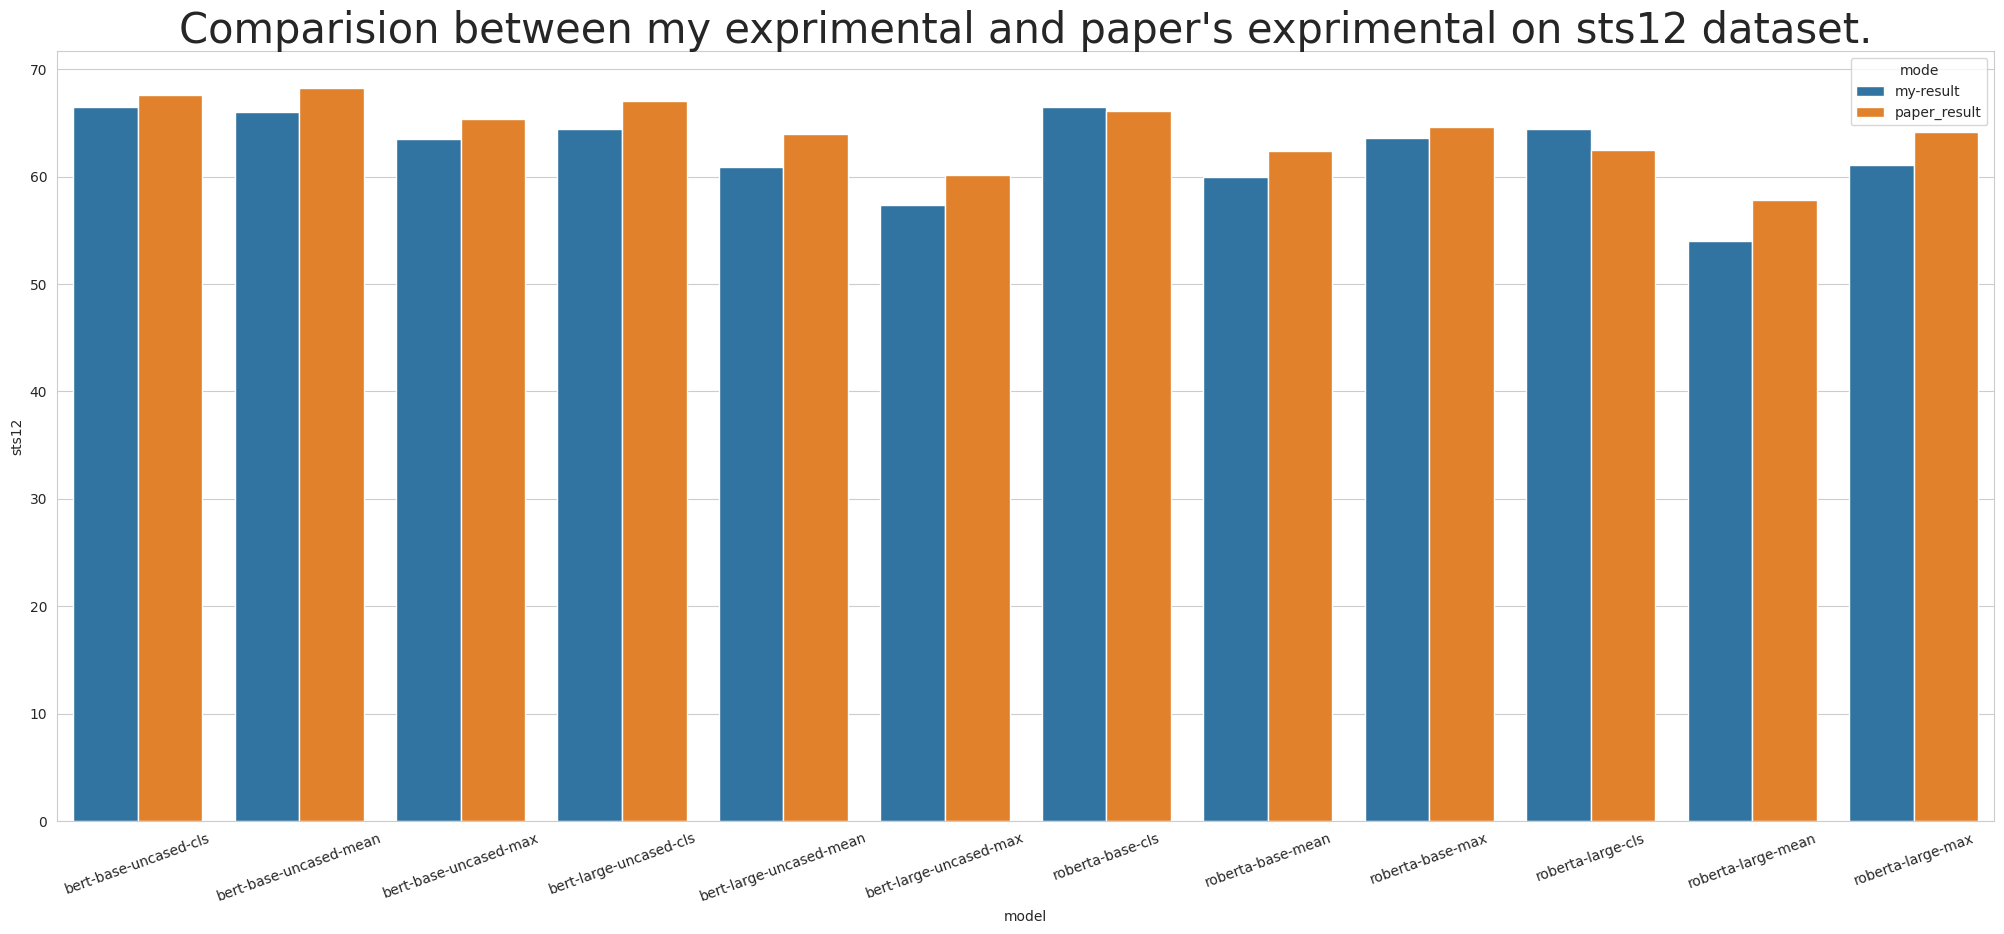

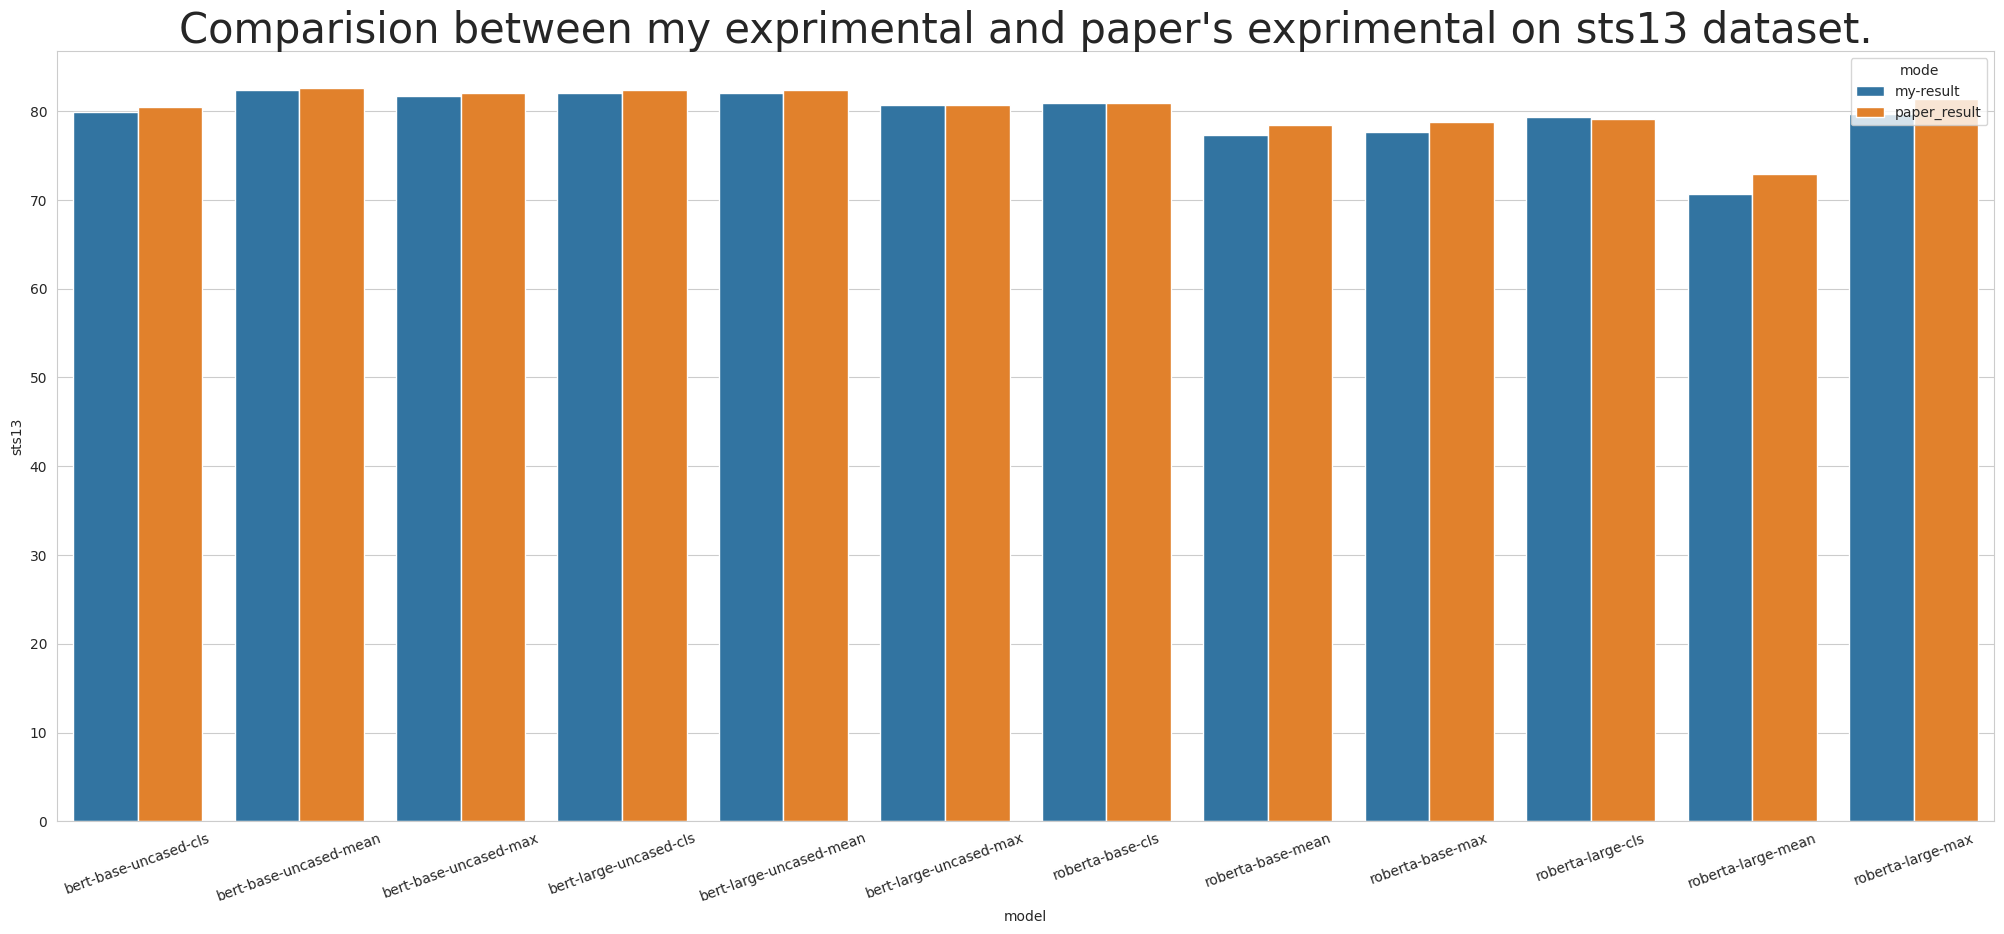

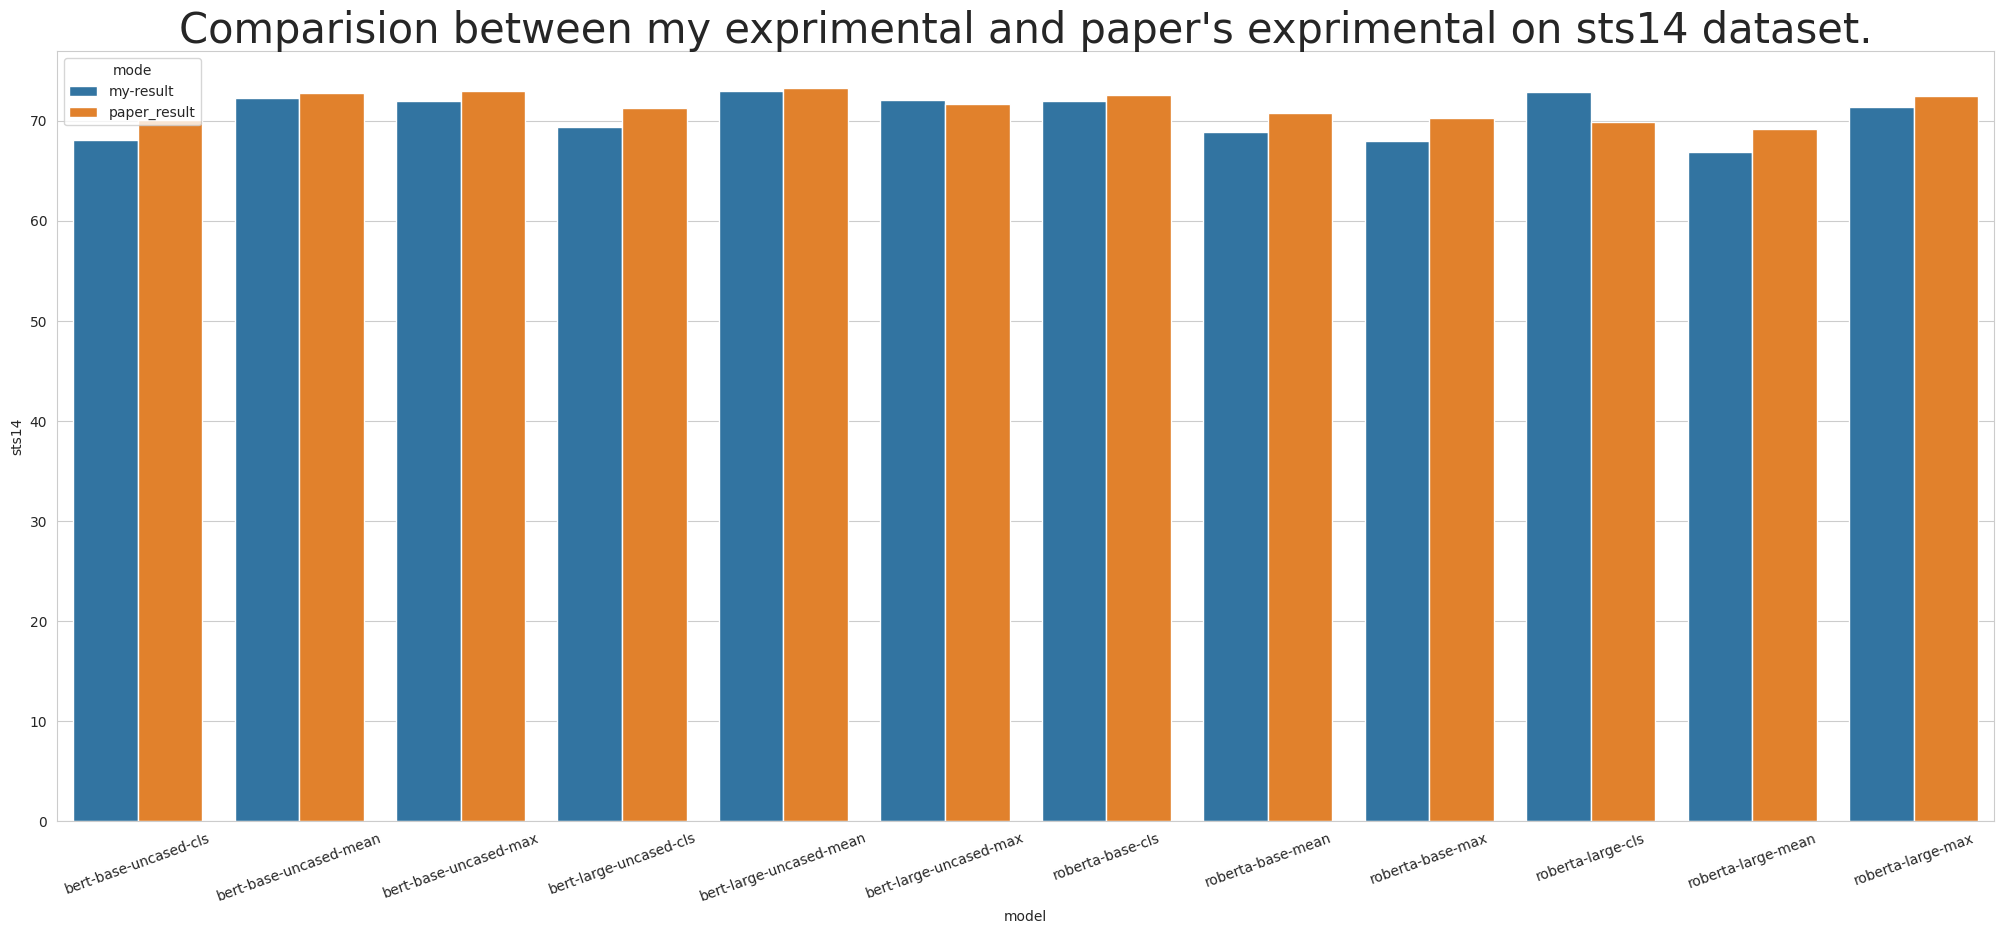

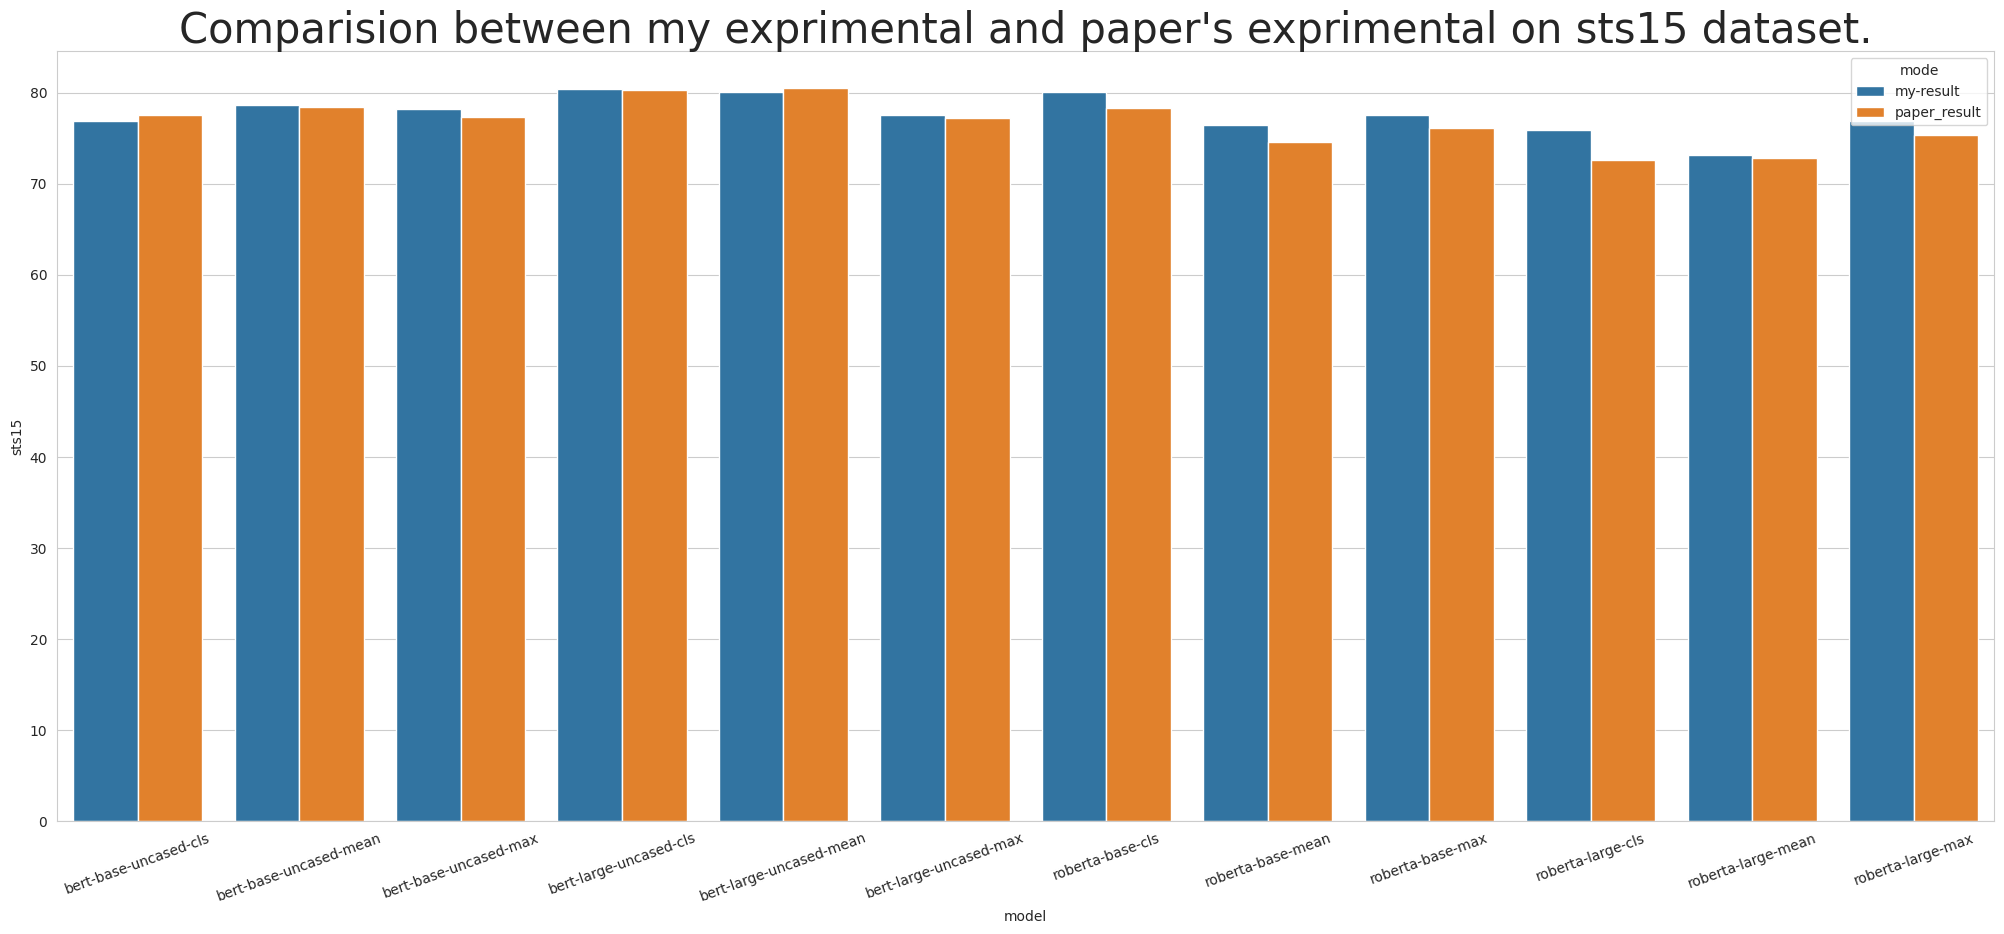

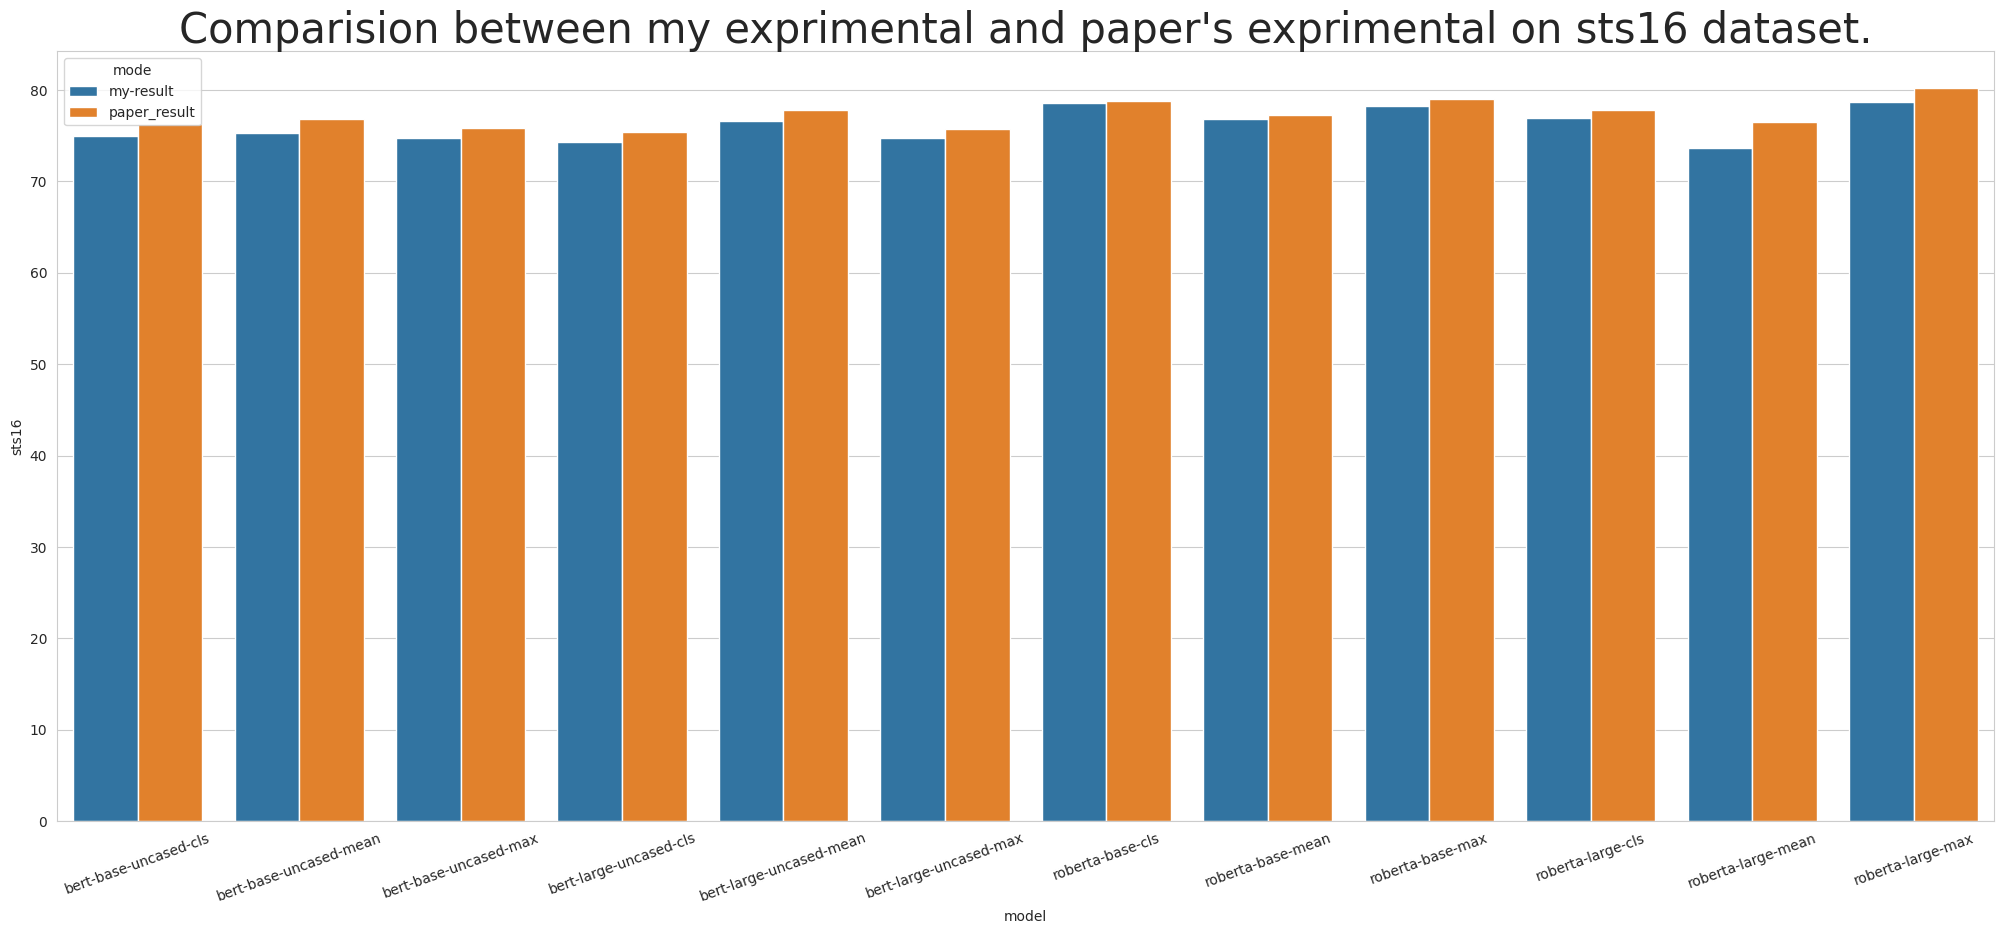

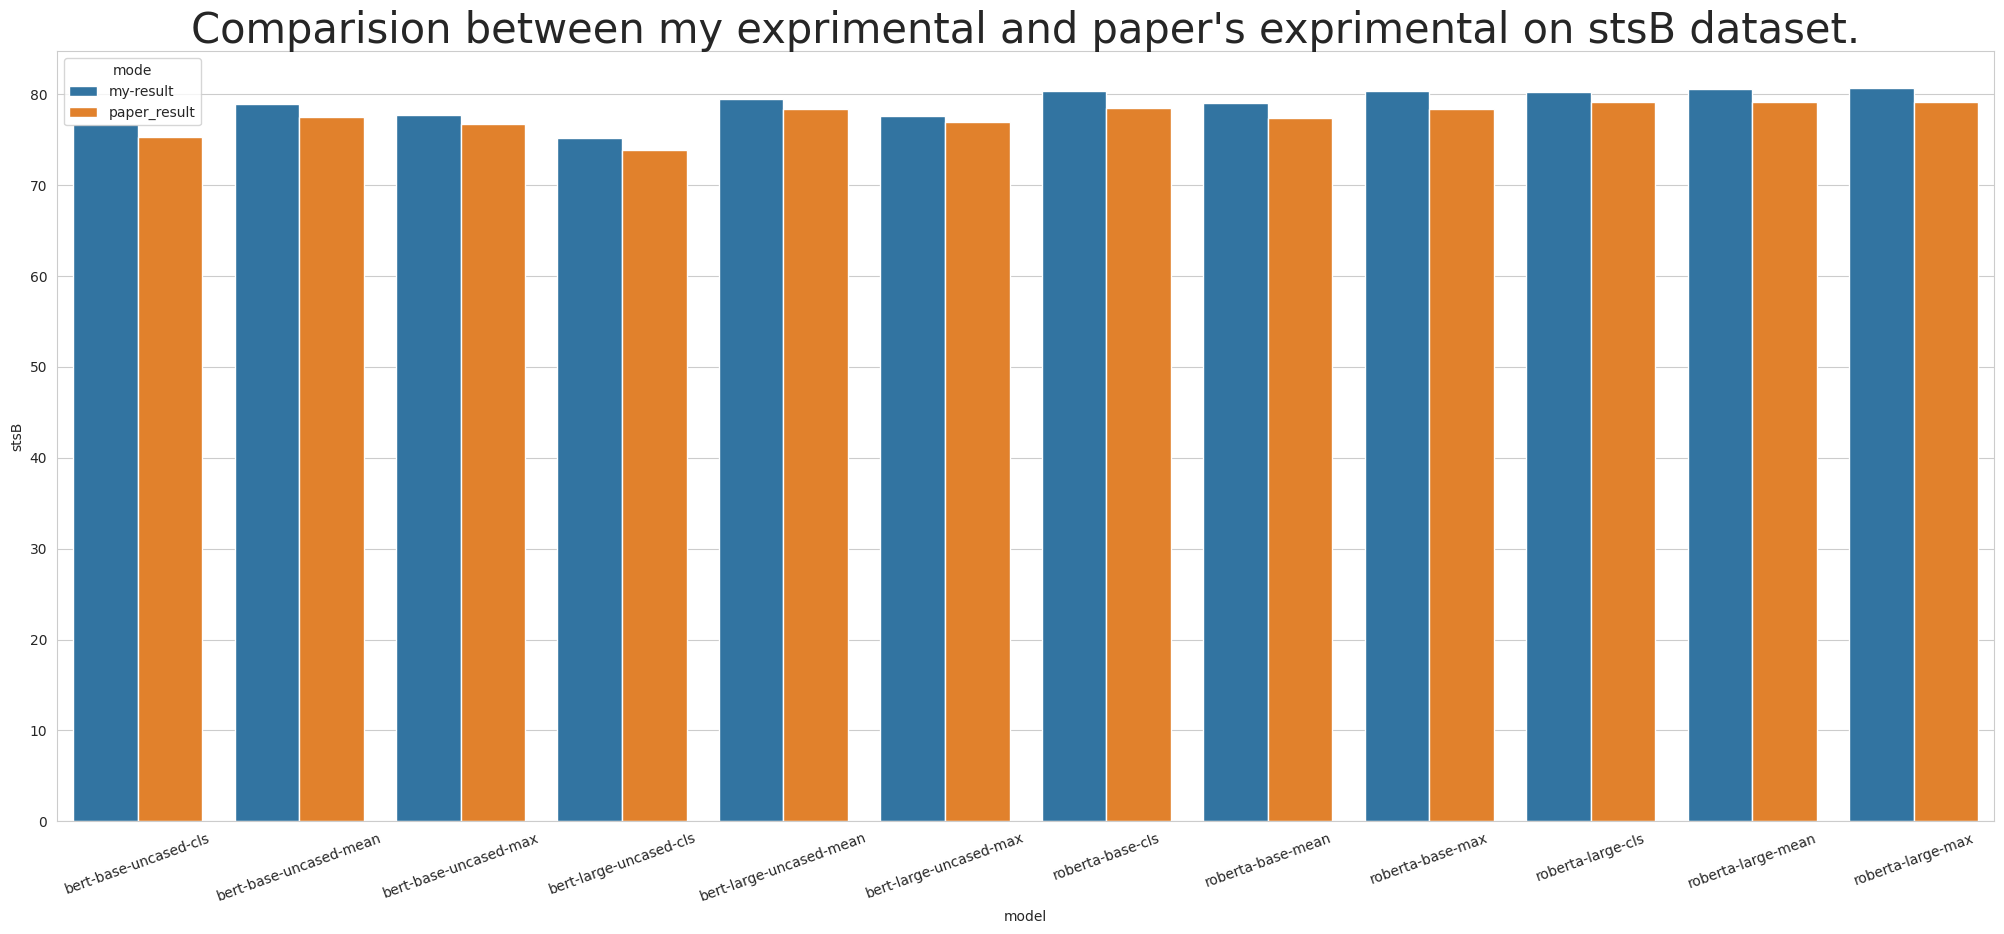

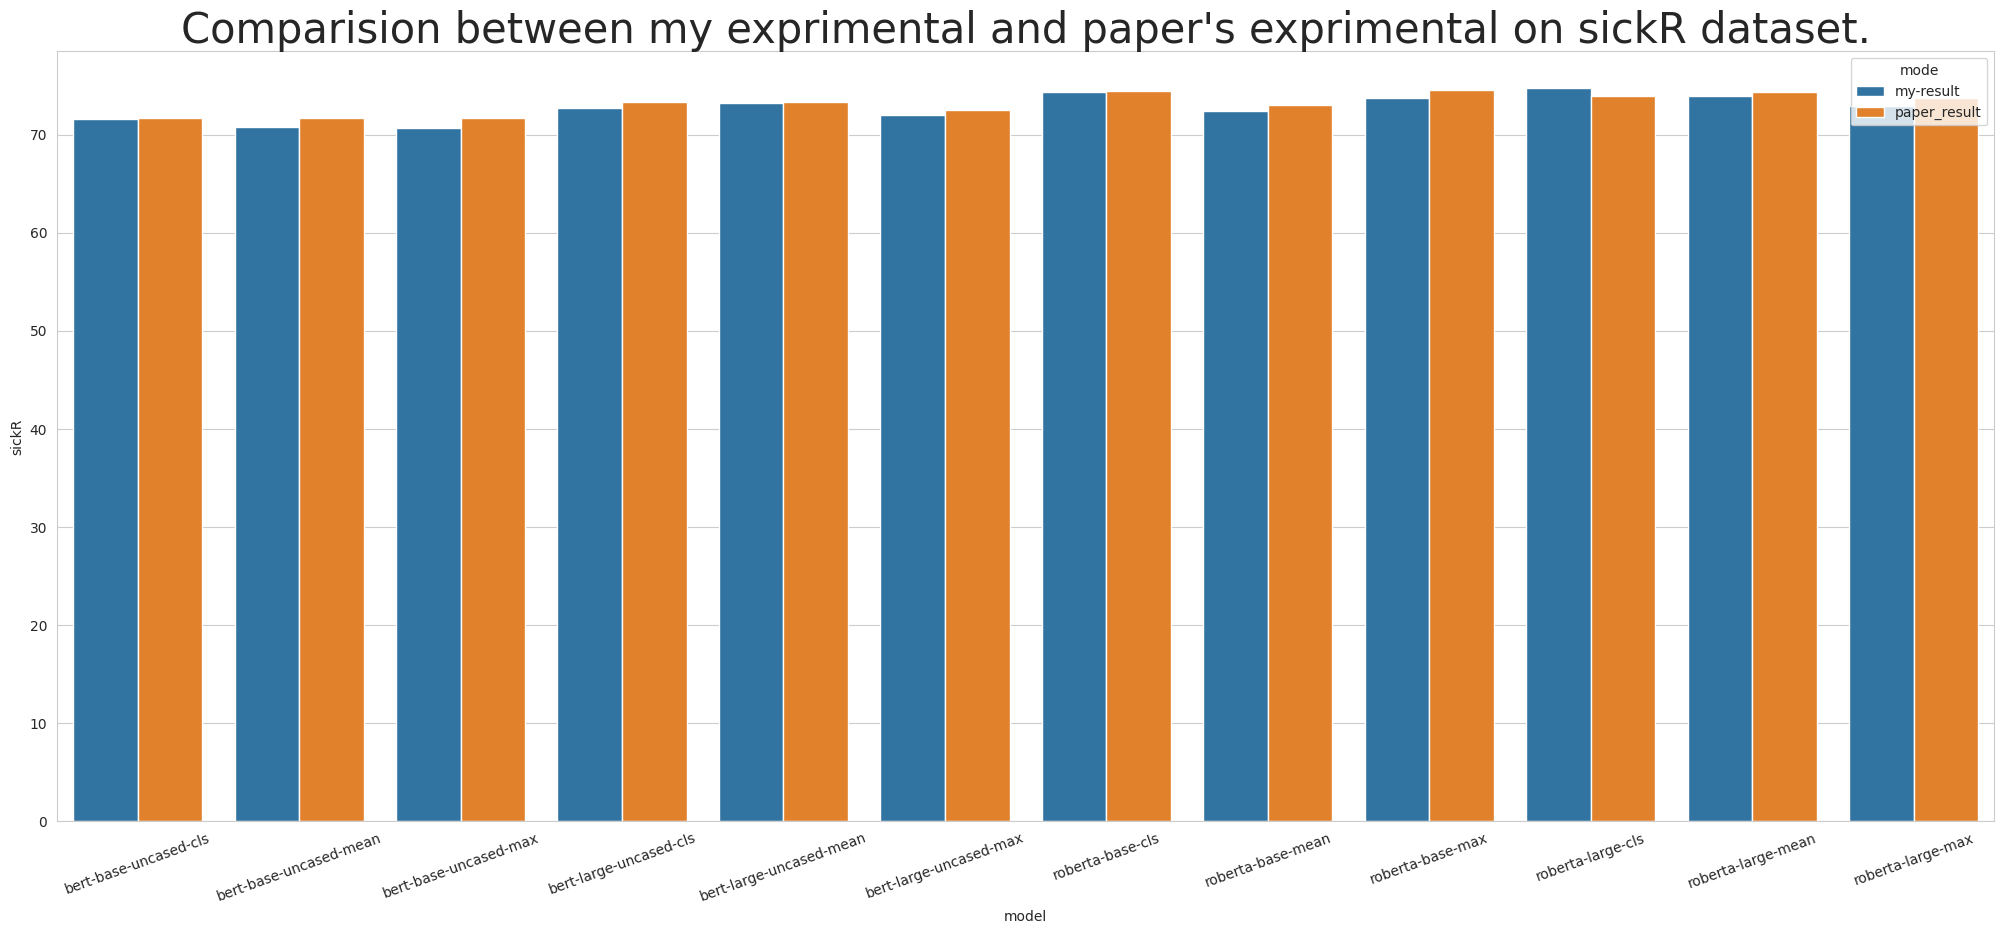

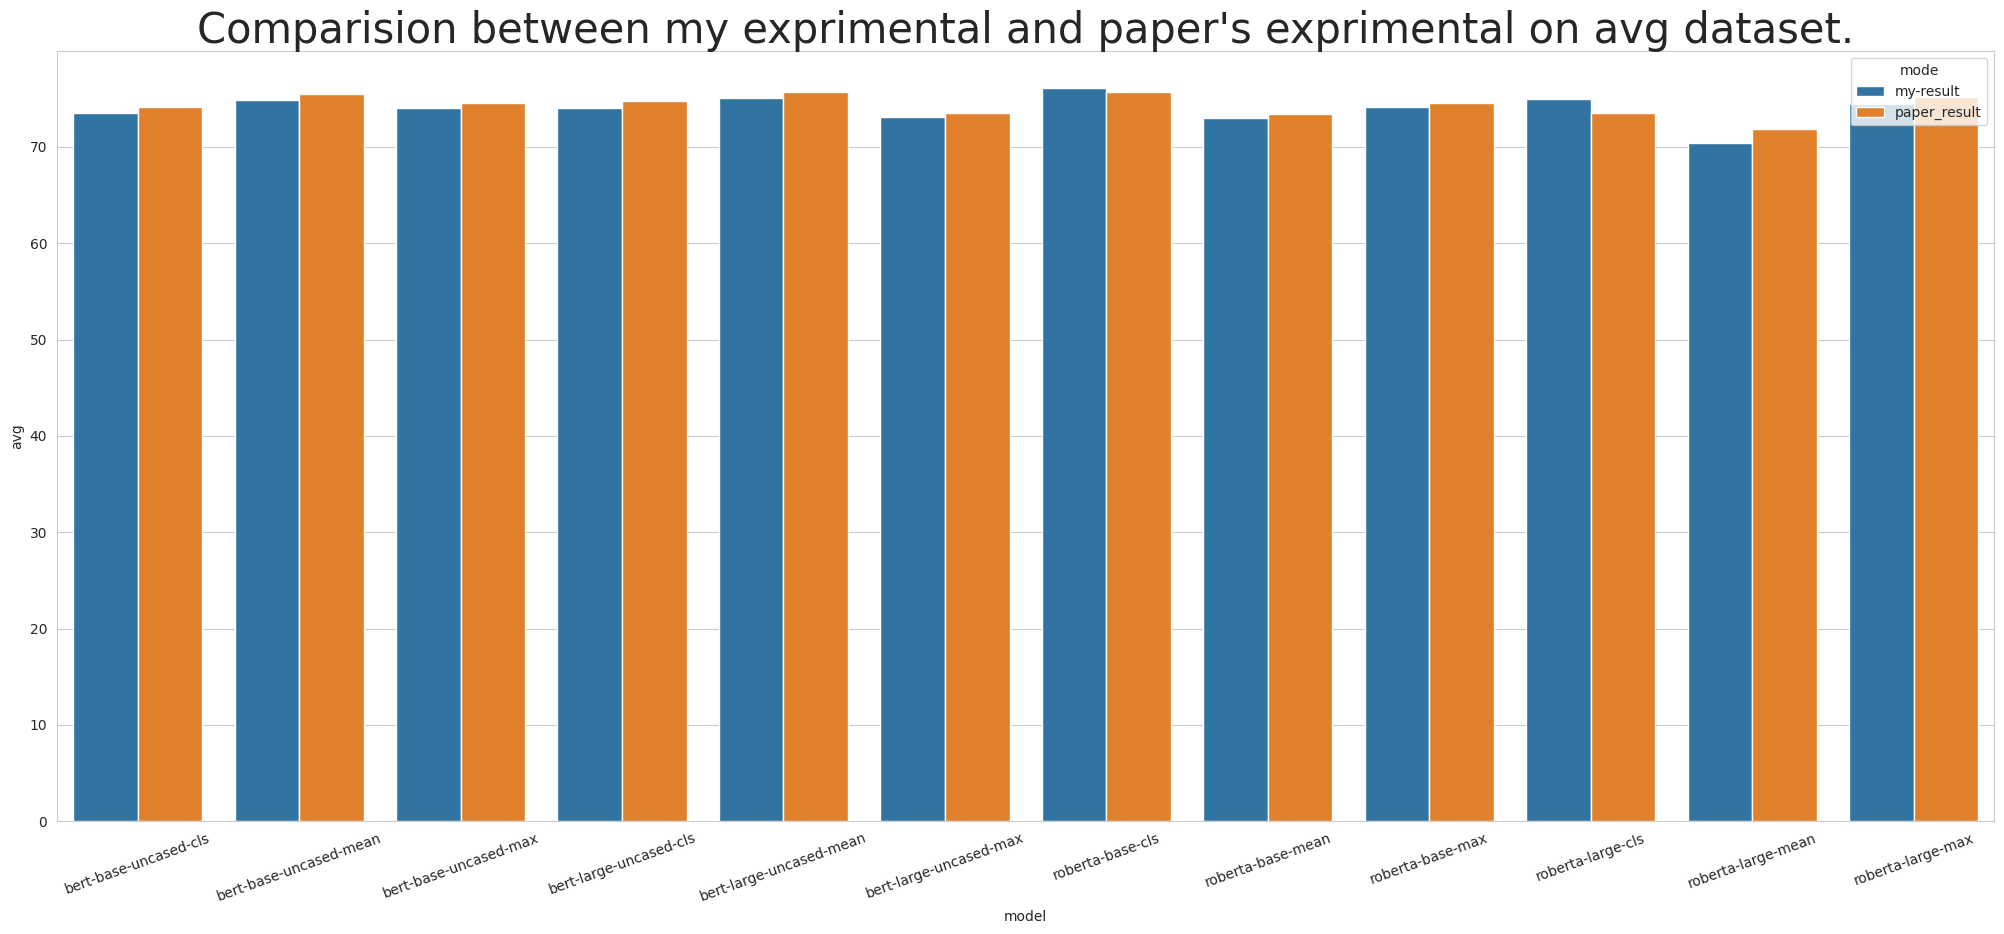

In [ ]:
for data_name in list_data_benchmark:
  plot_compare(combine_df, data_name, 'mode')

In [ ]:
!git clone https://github.com/4ursmile/defsent

Cloning into 'defsent'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 135 (delta 49), reused 131 (delta 45), pack-reused 0
Receiving objects: 100% (135/135), 1.11 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [ ]:
!rm -rf ./SentEval
!git clone https://github.com/4ursmile/SentEval
!cd $PWD/SentEval/data/downstream && bash get_transfer_data.bash > /dev/null 2>&1

Cloning into 'SentEval'...
remote: Enumerating objects: 697, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 697 (delta 6), reused 11 (delta 3), pack-reused 683
Receiving objects: 100% (697/697), 33.25 MiB | 9.73 MiB/s, done.
Resolving deltas: 100% (438/438), done.
Updating files: 100% (39/39), done.


In [ ]:
from pathlib import Path
import os
import sys
sys.path.append(f'{os.getcwd()}/SentEval')
import senteval
PATH_TO_DATA = f'{os.getcwd()}/SentEval/data'

# SentEval prepare and batcher
def prepare(params, samples):
    return


def batcher(params, batch):
    batch = [" ".join(sent) if sent else "." for sent in batch]
    embeddings = params["encoder"](batch)
    return embeddings


class SentEvalEvaluator:
    def __init__(self, data_dir):
        self.data_dir = data_dir

    def __call__(self, encoder):
        # # Set params for SentEval
        # params_senteval = {"task_path": self.data_dir, "usepytorch": True, "kfold": 5}
        # # params_senteval = {"task_path": self.data_dir, "usepytorch": True, "kfold": 2}
        # params_senteval["classifier"] = {
        #     "nhid": 0,
        #     "optim": "adam",
        #     "batch_size": 64,
        #     "tenacity": 3,
        #     # "epoch_size": 1,
        #     "epoch_size": 2,
        # }
        params_senteval = {'task_path': self.data_dir, 'usepytorch': True, 'kfold': 5}
        params_senteval['classifier'] = {'nhid': 0, 'optim': 'adam', 'batch_size': 128,
                                 'tenacity': 3, 'epoch_size': 2}
        params_senteval['encoder'] = encoder

        se = senteval.engine.SE(params_senteval, batcher, prepare)

        # sts = [
        #     "STS12",
        #     "STS13",
        #     "STS14",
        #     "STS15",
        #     "STS16",
        #     "STSBenchmark",
        #     "SICKRelatedness",
        # ]
        classification_tasks = [
            "MR",
            "CR",
            "SUBJ",
            "MPQA",
            "SST2",
            "TREC",
            "MRPC",
            "SICKEntailment"
        ]
        # probing_tasks = [
        #     "Length",
        #     "WordContent",
        #     "Depth",
        #     "TopConstituents",
        #     "BigramShift",
        #     "Tense",
        #     "SubjNumber",
        #     "ObjNumber",
        #     "OddManOut",
        #     "CoordinationInversion",
        # ]

        metrics = {}
        # for task in classification_tasks + probing_tasks + sts:
        for task in classification_tasks:
            # for task in se.list_tasks:
            print(task)
            try:
                metrics[task] = {
                    k: self.convert(v) for k, v in se.eval([task])[task].items()
                }
            except:
                print("error:", task)

        return metrics

    def convert(self, v):
        try:
            return float(v)
        except:
            try:
                return [float(x) for x in v]
            except:
                return -1

In [ ]:
eval = SentEvalEvaluator(PATH_TO_DATA)
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'

In [4]:
list_model = ['defsent-bert-base-uncased-cls',
              'defsent-bert-base-uncased-mean',
              'defsent-bert-base-uncased-max',
              'defsent-bert-large-uncased-cls',
              'defsent-bert-large-uncased-mean',
              'defsent-bert-large-uncased-max',
              'defsent-roberta-base-cls',
              'defsent-roberta-base-mean',
              'defsent-roberta-base-max',
              'defsent-roberta-large-cls',
              'defsent-roberta-large-mean',
              'defsent-roberta-large-max']

In [ ]:
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [ ]:
eval_list = []

for model in list_model:
  name = f'cl-nagoya/{model}'
  model = DefSent(name, device=torch.device('cuda'))
  res = eval(model.encode)
  eval_list.append(res)

MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


MR
CR
SUBJ
MPQA
SST2
TREC
MRPC
SICKEntailment


In [ ]:
eval_list

[{'MR': {'devacc': 81.05, 'acc': 80.64, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 87.63, 'acc': 86.6, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.28, 'acc': 93.78, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 89.69, 'acc': 89.37, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 85.21, 'acc': 85.45, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.36, 'acc': 84.2, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 72.55,
   'acc': 72.93,
   'f1': 81.89,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 80.6,
   'acc': 81.14,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 81.72, 'acc': 81.53, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 88.31, 'acc': 87.31, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.92, 'acc': 94.37, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.01, 'acc': 89.68, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 85.89, 'acc': 86.16, 'nd

In [ ]:
classification_tasks = [
            "MR",
            "CR",
            "SUBJ",
            "MPQA",
            "SST2",
            "TREC",
            "MRPC",
            "SICKEntailment"
        ]
sent_df = []
for task in classification_tasks:
  df = pd.DataFrame([d[task] for d in eval_list])
  df.columns = pd.MultiIndex.from_tuples([(task,col) for col in df.columns], names=["Task", "Infor"])
  sent_df.append(df)
sent_df = pd.concat(sent_df, axis=1)
sent_df.head(100)

In [1]:
eval_list = [{'MR': {'devacc': 81.05, 'acc': 80.64, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 87.63, 'acc': 86.6, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.28, 'acc': 93.78, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 89.69, 'acc': 89.37, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 85.21, 'acc': 85.45, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.36, 'acc': 84.2, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 72.55,
   'acc': 72.93,
   'f1': 81.89,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 80.6,
   'acc': 81.14,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 81.72, 'acc': 81.53, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 88.31, 'acc': 87.31, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.92, 'acc': 94.37, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.01, 'acc': 89.68, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 85.89, 'acc': 86.16, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 84.78, 'acc': 88.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.95,
   'acc': 75.77,
   'f1': 82.81,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.8,
   'acc': 82.61,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 80.95, 'acc': 80.5, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 88.06, 'acc': 86.49, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.39, 'acc': 94.03, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 89.87, 'acc': 89.73, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 86.58, 'acc': 85.56, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 84.08, 'acc': 85.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.95,
   'acc': 73.33,
   'f1': 81.86,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 84.4,
   'acc': 82.24,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 85.79, 'acc': 85.24, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.64, 'acc': 90.09, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 95.56, 'acc': 95.06, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.32, 'acc': 89.7, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 90.71, 'acc': 90.55, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.62, 'acc': 91.0, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 73.58,
   'acc': 73.62,
   'f1': 81.22,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 81.8,
   'acc': 81.73,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.87, 'acc': 84.39, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.05, 'acc': 88.95, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 95.38, 'acc': 94.8, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.19, 'acc': 89.86, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.42, 'acc': 89.95, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 83.44, 'acc': 87.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.39,
   'acc': 74.61,
   'f1': 82.96,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 81.2,
   'acc': 78.91,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 83.41, 'acc': 83.08, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 89.33, 'acc': 88.93, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.17, 'acc': 93.56, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.04, 'acc': 89.74, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.99, 'acc': 87.31, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 82.54, 'acc': 84.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.98,
   'acc': 76.17,
   'f1': 82.94,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.4,
   'acc': 81.73,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.12, 'acc': 83.55, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.24, 'acc': 88.79, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 93.46, 'acc': 92.91, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.83, 'acc': 90.54, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 87.73, 'acc': 89.95, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 82.02, 'acc': 87.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 75.49,
   'acc': 74.9,
   'f1': 82.96,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.2,
   'acc': 81.57,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.82, 'acc': 84.16, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.94, 'acc': 89.46, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.29, 'acc': 93.88, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.91, 'acc': 90.07, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.76, 'acc': 89.9, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 83.49, 'acc': 88.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 76.4,
   'acc': 75.88,
   'f1': 83.29,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.2,
   'acc': 81.69,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.24, 'acc': 83.79, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.52, 'acc': 88.85, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 93.97, 'acc': 93.29, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.9, 'acc': 90.45, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.65, 'acc': 89.46, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.75, 'acc': 92.0, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 77.72,
   'acc': 77.91,
   'f1': 84.72,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.8,
   'acc': 82.59,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.85, 'acc': 84.45, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.27, 'acc': 89.09, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.54, 'acc': 94.31, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 91.12, 'acc': 90.91, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 89.56, 'acc': 90.06, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.09, 'acc': 93.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.63,
   'acc': 72.87,
   'f1': 81.19,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 82.8,
   'acc': 82.32,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 86.07, 'acc': 85.03, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 91.13, 'acc': 90.81, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 95.1, 'acc': 94.71, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 91.11, 'acc': 90.9, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 91.51, 'acc': 90.06, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.64, 'acc': 92.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.46,
   'acc': 73.33,
   'f1': 80.27,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 81.4,
   'acc': 80.82,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.93, 'acc': 84.36, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 91.06, 'acc': 90.38, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.39, 'acc': 93.84, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 91.04, 'acc': 91.04, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 89.68, 'acc': 89.13, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 83.6, 'acc': 86.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 77.23,
   'acc': 76.75,
   'f1': 82.96,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 82.8,
   'acc': 82.57,
   'ndev': 500.0,
   'ntest': 4927.0}}]

In [6]:
import pandas as pd
classification_tasks = [
            "MR",
            "CR",
            "SUBJ",
            "MPQA",
            "SST2",
            "TREC",
            "MRPC",
            "SICKEntailment"
        ]
take_field = 'acc'
sent_df = []
for task in classification_tasks:
  df = pd.DataFrame([d[task][take_field] for d in eval_list])
  df.columns = [f"{task}_{take_field}"]
  sent_df.append(df)
sent_df = pd.concat(sent_df, axis=1)
sent_df['avg_acc'] = sent_df.mean(axis=1)
sent_df['model'] = list_model
sent_df.head(100)

,MR_acc,CR_acc,SUBJ_acc,MPQA_acc,SST2_acc,TREC_acc,MRPC_acc,SICKEntailment_acc,avg_acc,model
0,80.64,86.60,93.78,89.37,85.45,84.2,72.93,81.14,84.26375,defsent-bert-base-uncased-cls
1,81.53,87.31,94.37,89.68,86.16,88.8,75.77,82.61,85.77875,defsent-bert-base-uncased-mean
2,80.50,86.49,94.03,89.73,85.56,85.8,73.33,82.24,84.71000,defsent-bert-base-uncased-max
3,85.24,90.09,95.06,89.70,90.55,91.0,73.62,81.73,87.12375,defsent-bert-large-uncased-cls
4,84.39,88.95,94.80,89.86,89.95,87.8,74.61,78.91,86.15875,defsent-bert-large-uncased-mean
5,83.08,88.93,93.56,89.74,87.31,84.6,76.17,81.73,85.64000,defsent-bert-large-uncased-max
6,83.55,88.79,92.91,90.54,89.95,87.6,74.90,81.57,86.22625,defsent-roberta-base-cls
7,84.16,89.46,93.88,90.07,89.90,88.6,75.88,81.69,86.70500,defsent-roberta-base-mean
8,83.79,88.85,93.29,90.45,89.46,92.0,77.91,82.59,87.29250,defsent-roberta-base-max
9,84.45,89.09,94.31,90.91,90.06,93.6,72.87,82.32,87.20125,defsent-roberta-large-cls


In [7]:
sent_df.to_csv('senteval.csv')